In [ ]:
# setting root path
import os

os.chdir(r"c:\Users\valar\Documents\Flatiron\Assignments\Phase 2\Phase-2-Project")


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3




### Exploratory Analysis of our datasets

In [26]:
df_bom = pd.read_csv("data/bom.movie_gross.csv")
df_bom




,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [27]:
df_bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [28]:
df_bom[df_bom["domestic_gross"].isna()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,NaN,NaN,4000000,2012


In [29]:
# filling null values
# calculating total revenue
df_bom["domestic_gross"] = df_bom["domestic_gross"].fillna(0)
df_bom["foreign_gross"] = df_bom["foreign_gross"].fillna(0)
# changing strings to float to perform calculations

df_bom["domestic_gross"] = df_bom["domestic_gross"].replace('[\$,]','',regex=True).astype(float)
df_bom["foreign_gross"] = df_bom["foreign_gross"].replace('[\$,]','',regex=True).astype(float)

# calculating total revenue
df_bom["total_revenue"] = df_bom["domestic_gross"] + df_bom["foreign_gross"]

In [30]:
df_movie_info = pd.read_csv("data/rt.movie_info.tsv",sep='\t')
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [31]:
df_movie_info.info

<bound method DataFrame.info of         id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Acti

In [32]:
df_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [33]:
df_reviews = pd.read_csv("data/rt.reviews.tsv", sep='\t',encoding='latin1')
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [34]:
df_movies = pd.read_csv("data/tmdb.movies.csv")
df_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [35]:
df_movies.info

<bound method DataFrame.info of        Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-

In [36]:
df_movies.duplicated().sum()

0

In [37]:
df_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

### Mapping genre ids to genre names using Tmdb 

In [38]:
tmdb_genre_map = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}


In [39]:
import ast

# Convert string representation of list into actual list
df_movies['genre_ids'] = df_movies['genre_ids'].apply(ast.literal_eval)


In [40]:
df_movies['genre_names'] = df_movies['genre_ids'].apply(lambda x: [tmdb_genre_map[i] for i in x if i in tmdb_genre_map])


In [41]:
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"


In [42]:
df_movies = df_movies.drop(["Unnamed: 0"],axis=1)

In [43]:
df_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"


In [44]:
df_exploded = df_movies.explode("genre_names")


In [45]:
df_exploded.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure


In [46]:
conn = sqlite3.connect("data/im.db")

pd.read_sql("""SELECT name FROM sqlite_master WHERE type = "table";""",conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [47]:
query = """SELECT * FROM movie_basics;"""
df_movie_basics = pd.read_sql(query,conn)
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [48]:
df_movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [49]:
q = """SELECT * FROM movie_ratings;"""
df_movie_ratings = pd.read_sql(q,conn)
df_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [50]:
df_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


question one: Which genres perform best i.e had the highest ratings.

In [51]:
# Focus on Question 1
# first i want to combine movie ratings and movie info
# we see that both tables have no non-null values.

q = """SELECT * FROM movie_basics
        JOIN movie_ratings
        USING(movie_id);"""
df_imerged = pd.read_sql(q,conn)


In [52]:
df_imerged.duplicated().sum()

0

In [53]:
df_imerged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [54]:
df_imerged.info

<bound method DataFrame.info of         movie_id                    primary_title              original_title  \
0      tt0063540                        Sunghursh                   Sunghursh   
1      tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2      tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3      tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4      tt0100275         The Wandering Soap Opera       La Telenovela Errante   
...          ...                              ...                         ...   
73851  tt9913084                 Diabolik sono io            Diabolik sono io   
73852  tt9914286                Sokagin Çocuklari           Sokagin Çocuklari   
73853  tt9914642                        Albatross                   Albatross   
73854  tt9914942       La vida sense la Sara Amat  La vida sense la Sara Amat   
73855  tt9916160                       Drømmeland                  Drømmeland

### Data Cleaning

In [55]:
df_imerged.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

Dropping runtime_minutes column because i dont need it.

In [56]:
df_imerged = df_imerged.drop(["runtime_minutes"], axis=1)

In [57]:
# dropping the rows with null values for genre
df_imerged.dropna(subset=["genres"],inplace=True)

In [58]:
df_imerged.isna().sum()

movie_id          0
primary_title     0
original_title    0
start_year        0
genres            0
averagerating     0
numvotes          0
dtype: int64

In [59]:
# just using df_imerged to see which genre has the best ratings
df_imerged["numvotes"].value_counts()

6        2791
5        2605
7        2419
8        2107
9        1869
         ... 
8037        1
3943        1
18286       1
16289       1
4098        1
Name: numvotes, Length: 7349, dtype: int64

In [60]:
df_imerged = df_imerged.assign(genres=(df_imerged["genres"].str.split(",")))
df_imerged = df_imerged.explode("genres")
df_imerged

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,Drama,7.2,43
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,Drama,8.7,136
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,Family,8.7,136
73853,tt9914642,Albatross,Albatross,2017,Documentary,8.5,8


In [61]:
df_imerged.duplicated().sum()

0

In [62]:
#Computing weighted rating for each genre using IMDB'S weighted rating formula

C = df_imerged["averagerating"].mean()
# getting only the top 10 most popular movies
m = df_imerged["numvotes"].quantile(0.90)

#filtering our dataframe and computing weighted_rating for top 10%  of movies by votes
top_10= df_imerged[df_imerged["numvotes"] >= m].copy()

top_10["weighted_rating"] = ((top_10["numvotes"]/(top_10["numvotes"] + m)) * top_10["averagerating"] + (m/(top_10["numvotes"] + m)) * C)

# group top_10 df by genres and get movie count per genre
genre_table = (top_10.groupby(["genres"]).agg(avg_weighted_rating=("weighted_rating", "mean"),
                                num_movies=("primary_title", "count"))
               .sort_values(by="num_movies", ascending=False))

genre_table



,avg_weighted_rating,num_movies
genres,,
Drama,6.559714,2914
Comedy,6.284026,1680
Action,6.289293,1291
Thriller,6.209458,1045
Crime,6.426328,840
Romance,6.401094,759
Adventure,6.395199,716
Horror,5.827840,712
Mystery,6.273842,453


#DATA VISUALIZATION

1. How do different genres perform according to ratings?

<ipython-input-63-c1d1210c56f3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(genre_table_sorted.index, rotation=45, ha='right')


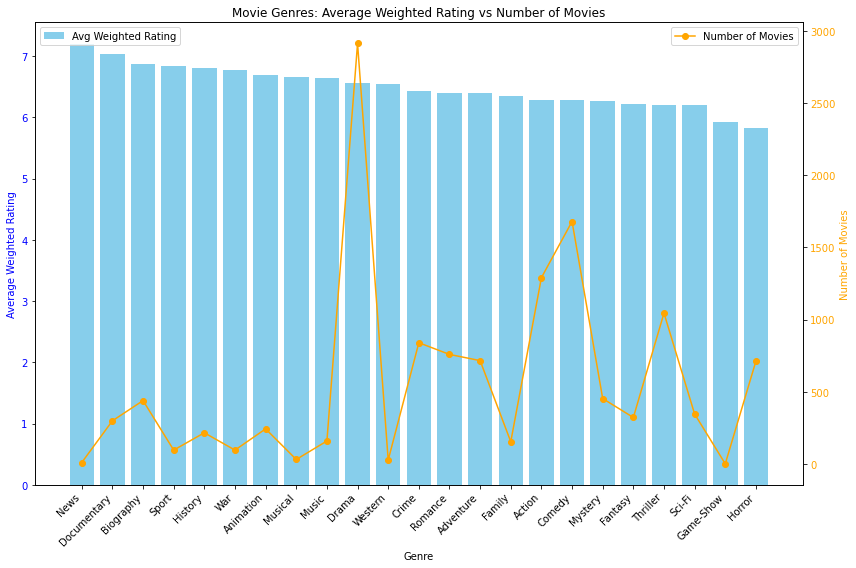

In [63]:
# Sort genres by avg_weighted_rating for nicer plotting
genre_table_sorted = genre_table.sort_values("avg_weighted_rating", ascending=False)

fig, ax1 = plt.subplots(figsize=(12,8))

# Bar chart for average weighted rating
ax1.bar(genre_table_sorted.index, genre_table_sorted["avg_weighted_rating"], color='skyblue', label='Avg Weighted Rating')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Weighted Rating', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(genre_table_sorted.index, rotation=45, ha='right')

# Add a second y-axis for num_movies
ax2 = ax1.twinx()
ax2.plot(genre_table_sorted.index, genre_table_sorted["num_movies"], color='orange', marker='o', linestyle='-', label='Number of Movies')
ax2.set_ylabel('Number of Movies', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title
plt.title('Movie Genres: Average Weighted Rating vs Number of Movies')

# Optional: show both legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


## Data Recommendation
From the graph we can see that genre categories like News and Documentary have the one of the highest ratings.However the number of movies produced are  on the smaller side(10 for news and 299 for Documentary). These numbers represent a niche market with highly dedicated viewers. It is recommended we explore these genres.

Genres like Drama has the highest number of movies and a fairly high rating of (6.5) making it another safe and reliable choice.However it also means there is high competition here.



## 2.How do different genres perform according to profitability

To answer this question, we are going to look at the tn.movie_budgets.csv dataset. We shall compute profit for each movie and group by genre to see which genres are most profitable.

In [64]:
df_budget = pd.read_csv("data/tn.movie_budgets.csv")
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [65]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [66]:
# checking for null values

df_budget.isna().sum()


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [67]:
# checking for any duplicates
df_budget.duplicated().sum()

0

## Data Analysis
2.How do different genres perform according to profitability


In [68]:
# trying to get genres column by merging...
df_merged = pd.merge(df_budget,df_imerged[["primary_title","genres"]],
                    left_on= "movie",
                    right_on="primary_title",
                    how="inner")

df_merged.info



<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
4      3   Jun 7, 2019                                 Dark Phoenix   
...   ..           ...                                          ...   
6439  78  Dec 31, 2018                                       Red 11   
6440  78  Dec 31, 2018                                       Red 11   
6441  81  Sep 29, 2015                         A Plague So Pleasant   
6442  81  Sep 29, 2015                         A Plague So Pleasant   
6443  81  Sep 29, 2015                         A Plague So Pleasant   

     production_budget domestic_gross worldwide_gross  \
0         $425,000,000   $760,507,625  $2,776,345,279   
1

In [69]:
# checking the length of unique movie titles we got from the merge
len(df_merged["movie"].unique().tolist())

2126

In [70]:
#dropping the extra movie title column
df_merged = df_merged.drop(["primary_title"], axis=1)

In [71]:
df_merged.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Action
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Adventure
3,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Fantasy
4,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Action


### I am creating a profit column (gross - budget)

In [72]:
df_merged["worldwide_gross"] = df_merged["worldwide_gross"].replace('[\$,]','',regex=True).astype(float)
df_merged["production_budget"]= df_merged["production_budget"].replace('[\$,]','',regex=True).astype(float)

In [73]:
df_merged["profit"] = df_merged["worldwide_gross"] - df_merged["production_budget"]

In [74]:
# Now let's groupby genre and profit
profit_per_genre = df_merged.groupby("genres")["profit"].mean().sort_values(ascending=False)
profit_per_genre

genres
Animation      2.317402e+08
Adventure      2.086830e+08
Sci-Fi         1.753962e+08
Fantasy        1.459293e+08
Musical        1.383086e+08
Action         1.257256e+08
Family         1.101244e+08
Comedy         7.271444e+07
Sport          5.396716e+07
Thriller       5.336520e+07
Mystery        4.879189e+07
Music          4.775460e+07
Biography      4.685618e+07
Horror         4.604951e+07
Romance        4.274458e+07
History        3.919284e+07
Crime          3.912772e+07
Drama          3.776152e+07
Documentary    3.499979e+07
Western        3.011840e+07
News           2.008208e+07
War            1.947261e+07
Name: profit, dtype: float64

##Data Visualization(question 2)

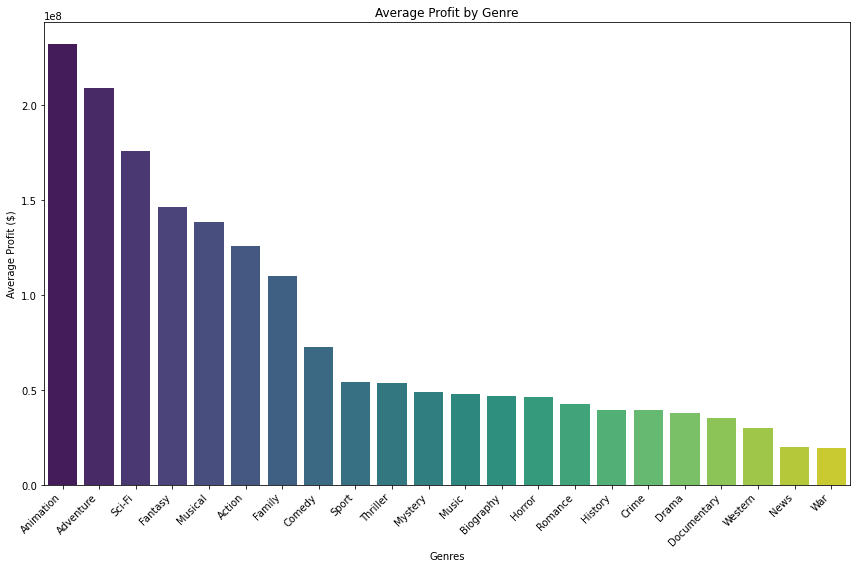

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=profit_per_genre.index,y=profit_per_genre.values,palette="viridis",ax=ax)
ax.set_xlabel("Genres")
ax.set_ylabel("Average Profit ($)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Average Profit by Genre")

plt.tight_layout()
plt.show()

The genres with the highest profit are Animation,adventure and Sci-fi.

## Question 3: How do production budgets relate to box office Revenue?

We are going to see if investing on high budget films always lead to higher revenue. To do this we will look at production budget and worldwide gross columns in our tn.movie_budgets.csv

since the data is already cleaned we will jump into data analysis and visualization.

In [76]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [79]:
df_budget["worldwide_gross"] = df_budget["worldwide_gross"].replace('[\$,]','',regex=True).astype(float)
df_budget["production_budget"]= df_budget["production_budget"].replace('[\$,]','',regex=True).astype(float)

Calculating correlation between production budget and worldwide gross.

In [90]:
corr = df_budget['production_budget'].corr(df_budget['worldwide_gross'])
print(corr)


0.7483059765694747


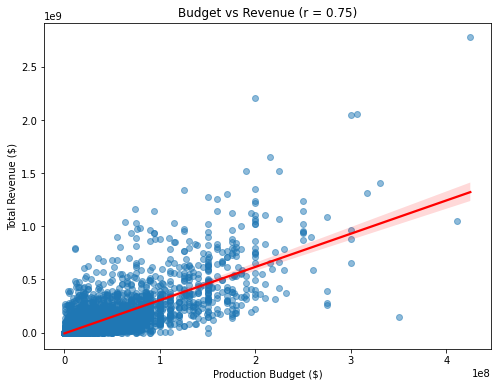

In [97]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_budget, x="production_budget", y="worldwide_gross", scatter_kws={"alpha":0.5},line_kws={"color":"red"})
plt.title(f"Budget vs Revenue (r = {corr:.2f})")
plt.xlabel("Production Budget ($)")
plt.ylabel("Total Revenue ($)")
plt.show()


The correlation coefficient, 0.7, shows a strong positive correlation between production budget and total revenue. Higher budget films get higher returns. We recommend the company invest in higher budget films as it is likely to pay off.

# Conclusion

The analysis shows that News and Documentary genres have the highest average ratings, indicating strong audience appreciation despite their smaller production numbers. These genres represent niche markets with dedicated viewers and could be explored further for targeted, high-quality releases.

Animation, Adventure, and Science Fiction films show the highest profitability, making them ideal candidates for investment. Their strong performance suggests a balance between audience appeal and financial return.

The strong positive correlation coefficient (r = 0.7) between production budget and total revenue confirms that higher-budget films generally yield higher box office returns.

Recommendations:

1. Explore Documentary and News genres to capitalize on high audience ratings and loyal viewership.

2. Prioritize Animation, Adventure, and Sci-Fi films for their strong profitability and market potential.

3. Invest in higher-budget productions, as they are likely to generate greater revenue returns.